In [1]:
# import package

from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    result: int

In [3]:
def adder(state: AgentState) -> AgentState:
    """ This node + the 2 numbers"""

    state["result"] = state["number1"] + state["number2"]

    return state

def subtracter(state: AgentState) -> AgentState:
    """ This node - the 2 numbers"""

    state["result"] = state["number1"] - state["number2"]

    return state

def multiplier(state: AgentState) -> AgentState:
    """ This node * the 2 numbers"""

    state["result"] = state["number1"] * state["number2"]

    return state

def divider(state: AgentState) -> AgentState:
    """ This node / the 2 numbers"""

    state["result"] = state["number1"] / state["number2"]

    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ This node select next node in graph"""

    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation"
    
    elif state["operation"] == "*":
        return "multiply_operation"
    
    elif state["operation"] == "/":
        return "divide_operation"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtracter)
graph.add_node("multiply_node", multiplier)
graph.add_node("divide_node", divider)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,

    {   
        #Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
        "multiply_operation": "multiply_node",
        "divide_operation": "divide_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
graph.add_edge("multiply_node", END)
graph.add_edge("divide_node", END)

app = graph.compile()

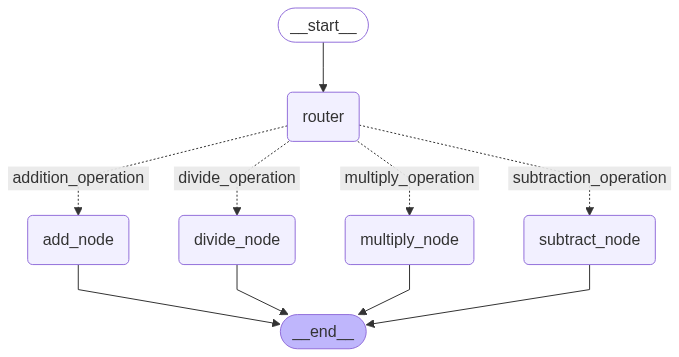

In [5]:
# import package
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
add_state = AgentState(number1=5, operation="+", number2=2)
print(app.invoke(add_state))

{'number1': 5, 'operation': '+', 'number2': 2, 'result': 7}


In [7]:
minus_state = AgentState(number1=5, operation="-", number2=2)
print(app.invoke(minus_state))

{'number1': 5, 'operation': '-', 'number2': 2, 'result': 3}


In [8]:
multiply_state = AgentState(number1=5, operation="*", number2=2)
print(app.invoke(multiply_state))

{'number1': 5, 'operation': '*', 'number2': 2, 'result': 10}


In [9]:
divide_state = AgentState(number1=5, operation="/", number2=2)
print(app.invoke(divide_state))

{'number1': 5, 'operation': '/', 'number2': 2, 'result': 2.5}
